In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import matplotlib.dates as mdates

In [8]:
df_gen1 = pd.read_csv(r'C:\Users\Rushika K Shankar\Downloads\archive\Plant_1_Generation_Data.csv')
df_sen1 = pd.read_csv(r'C:\Users\Rushika K Shankar\Downloads\archive\Plant_1_Weather_Sensor_Data.csv')

In [9]:
df_gen1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [11]:
df_gen1.isnull()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
68773,False,False,False,False,False,False,False
68774,False,False,False,False,False,False,False
68775,False,False,False,False,False,False,False
68776,False,False,False,False,False,False,False


In [13]:
df_sen1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [14]:
df_sen1.isnull()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3177,False,False,False,False,False,False
3178,False,False,False,False,False,False
3179,False,False,False,False,False,False
3180,False,False,False,False,False,False


In [16]:
df_gen1.drop('PLANT_ID', axis=1, inplace=True)
df_sen1.drop('PLANT_ID', axis=1, inplace=True)

df_gen1['DATE_TIME']= pd.to_datetime(df_gen1['DATE_TIME'],format='%d-%m-%Y %H:%M')
df_sen1['DATE_TIME']= pd.to_datetime(df_sen1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

In [17]:
df_gen1.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,2020-06-01 08:02:49.458256896,3147.426211,307.802752,3295.968737,6.978712e+06
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6.183645e+06
25%,2020-05-24 00:45:00,0.000000,0.000000,0.000000,6.512003e+06
50%,2020-06-01 14:30:00,429.000000,41.493750,2658.714286,7.146685e+06
75%,2020-06-09 20:00:00,6366.964286,623.618750,6274.000000,7.268706e+06
max,2020-06-17 23:45:00,14471.125000,1410.950000,9163.000000,7.846821e+06
std,NaN,4036.457169,394.396439,3145.178309,4.162720e+05


In [18]:
df_sen1.describe()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182,3182.000000,3182.000000,3182.000000
mean,2020-06-01 05:52:22.080452608,25.531606,31.091015,0.228313
min,2020-05-15 00:00:00,20.398505,18.140415,0.000000
25%,2020-05-23 22:48:45,22.705182,21.090553,0.000000
50%,2020-06-01 09:52:30,24.613814,24.618060,0.024653
75%,2020-06-09 16:56:15,27.920532,41.307840,0.449588
max,2020-06-17 23:45:00,35.252486,65.545714,1.221652
std,NaN,3.354856,12.261222,0.300836


In [20]:
df_gen1["DAILY_YIELD"].mean()

3295.968737182595

In [24]:
irr_total = df_sen1['IRRADIATION'].sum()
irr_avg = irr_total / 34
print(irr_avg)

21.367394860850066


In [25]:
df_sen1[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].max()

AMBIENT_TEMPERATURE    35.252486
MODULE_TEMPERATURE     65.545714
dtype: float64

In [26]:
inv_id_list = df_gen1['SOURCE_KEY'].unique()
print(len(df_gen1['SOURCE_KEY'].unique()))
print(inv_id_list)

22
['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE']


In [28]:
df_gen1[['AC_POWER','DC_POWER']].idxmax(axis=0)

AC_POWER    61624
DC_POWER    61624
dtype: int64

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
AMBIENT_TEMPERATURE,1.000000,0.853778,0.722999
MODULE_TEMPERATURE,0.853778,1.000000,0.961566
IRRADIATION,0.722999,0.961566,1.000000


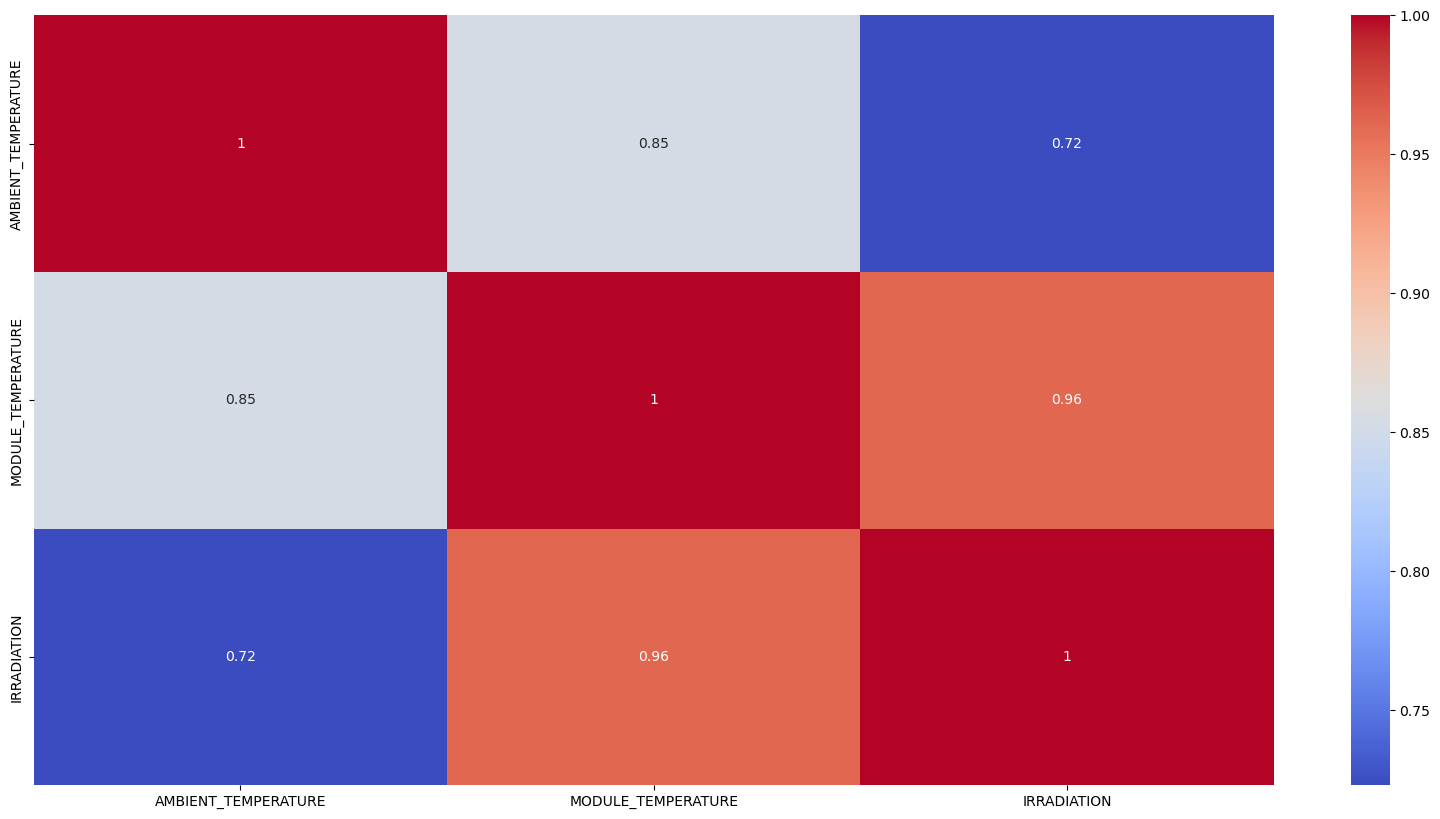

In [30]:
plt.figure(figsize=(20,10))
c = df_sen1.select_dtypes(include=['float64','int64']).corr()

sns.heatmap(c, cmap="coolwarm", annot=True)
c


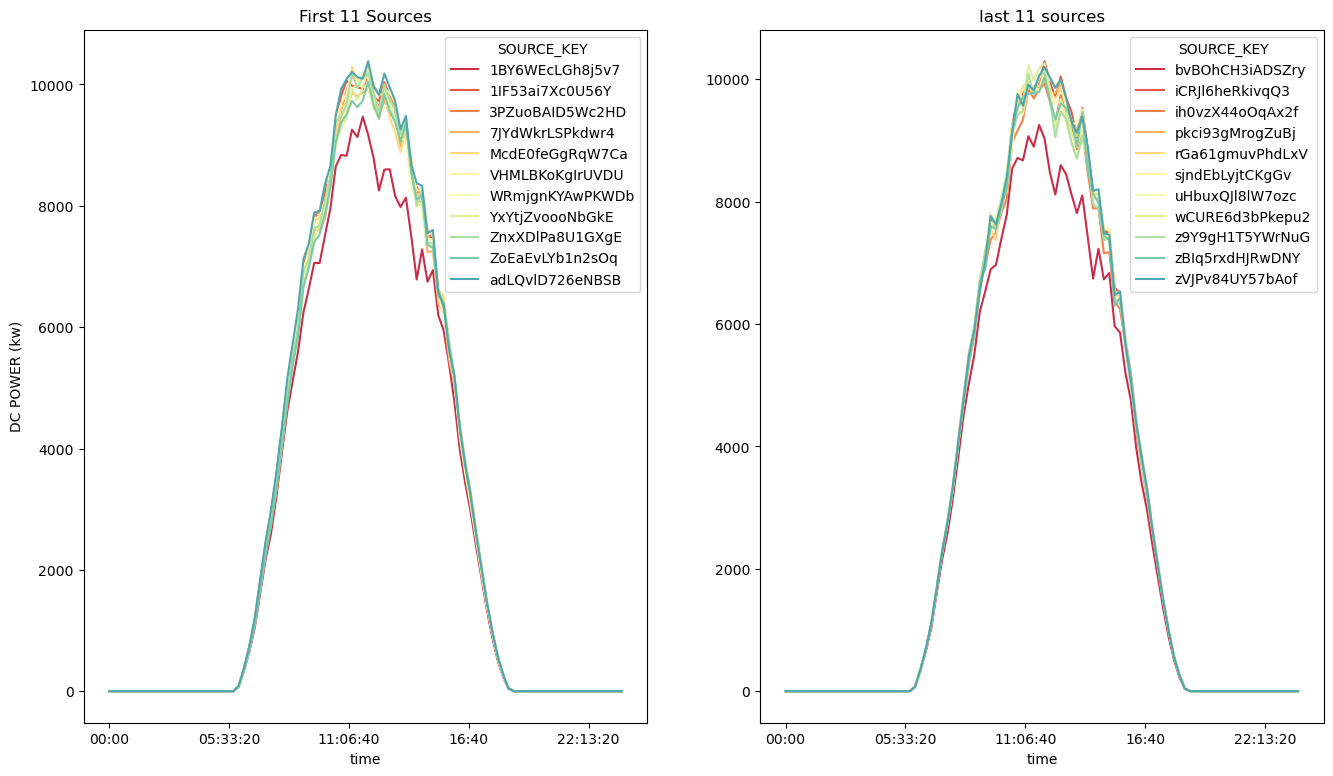

In [32]:
dc_gen=df_gen1.copy()
dc_gen['time']=dc_gen['DATE_TIME'].dt.time
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(16,9))
dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 Sources')
ax[0].set_ylabel('DC POWER (kw)')
ax[1].set_title('last 11 sources')
plt.show()

<Axes: xlabel='time'>

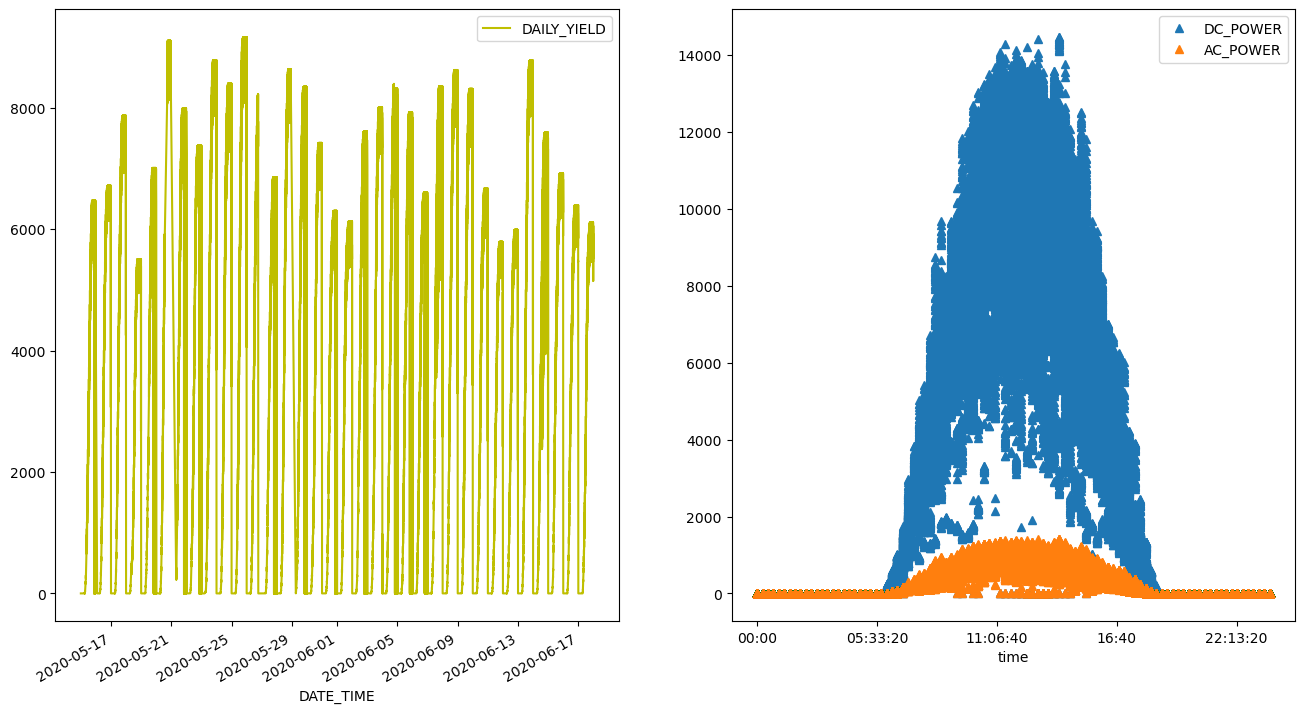

In [34]:
df_gen1['time']=df_gen1['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(16,9))

df_gen1.plot(x='DATE_TIME', y='DAILY_YIELD', color='y', ax=ax[0])

df_gen1.plot(x ='time', y='DC_POWER', style='^', ax=ax[1])
df_gen1.plot(x ='time', y='AC_POWER', style='^', ax=ax[1])

In [36]:
temp_gen1=df_gen1.copy()

temp_gen1['time']=temp_gen1['DATE_TIME'].dt.time
temp_gen1['day']=temp_gen1['DATE_TIME'].dt.date

temp_sen1=df_sen1.copy()

temp_sen1['time']=temp_sen1['DATE_TIME'].dt.time
temp_sen1['day']=temp_sen1['DATE_TIME'].dt.date

cols=temp_gen1.groupby(['time','day'])['DC_POWER'].mean().unstack()


NameError: name 'size' is not defined

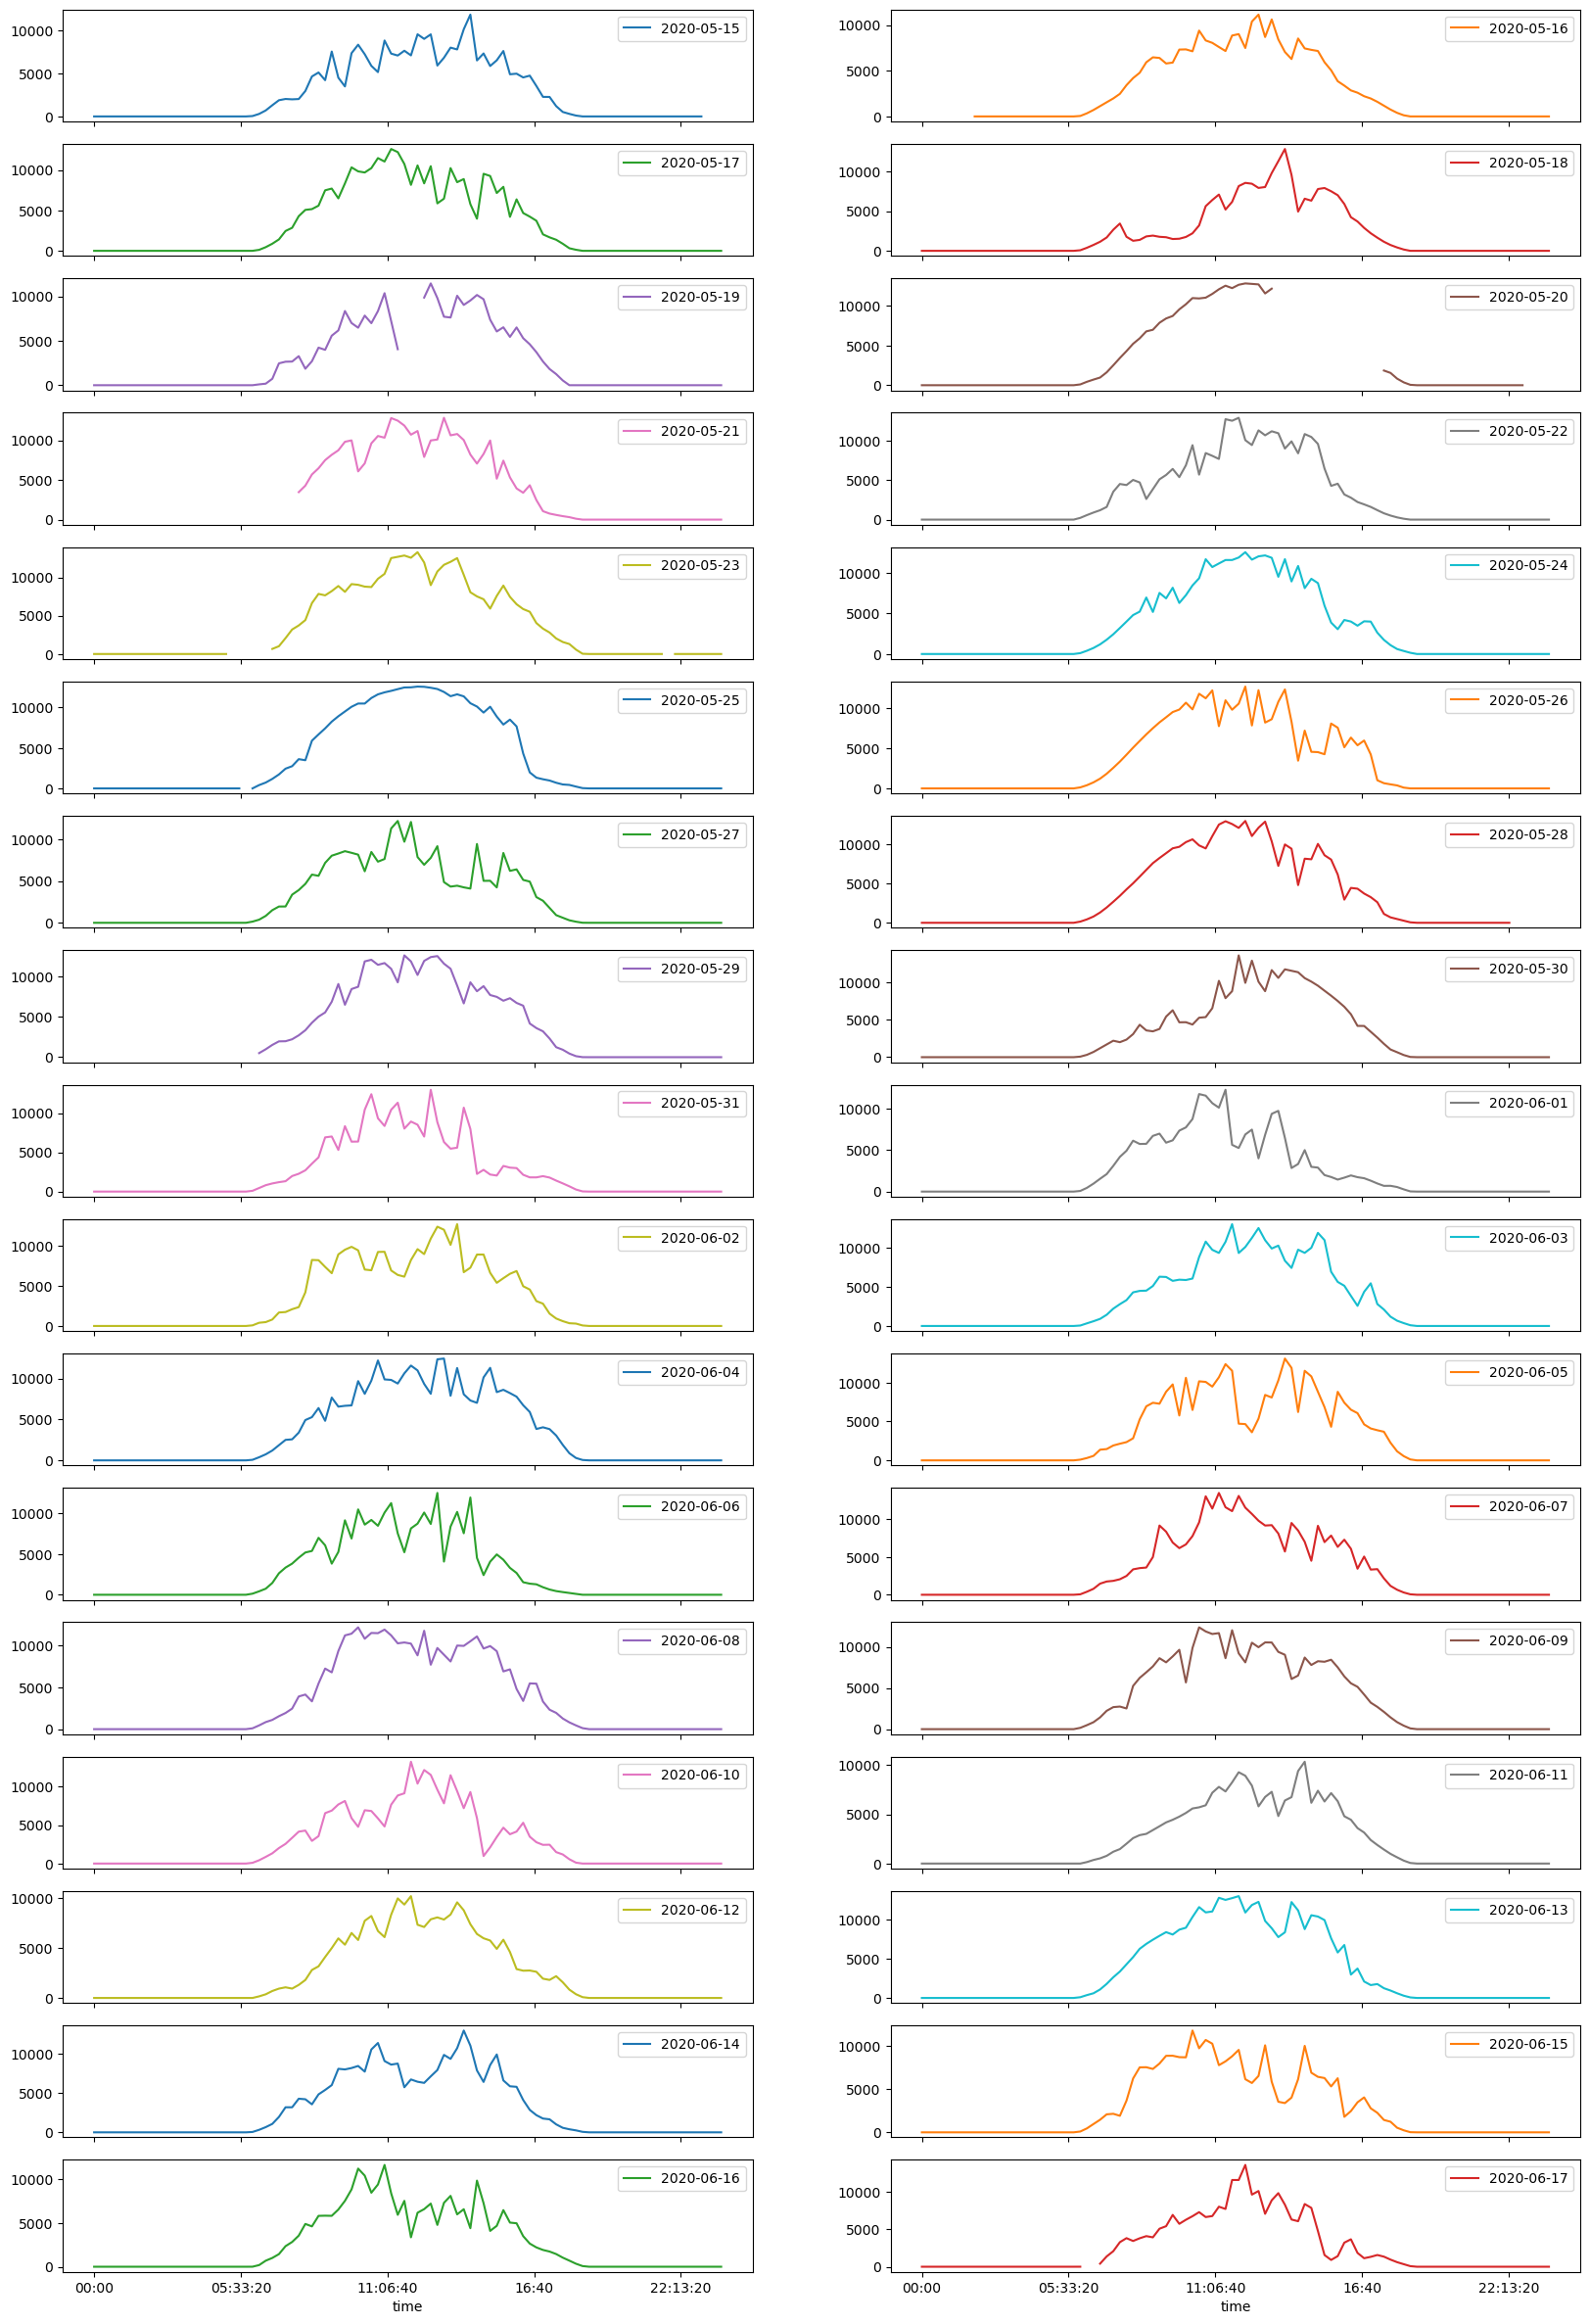

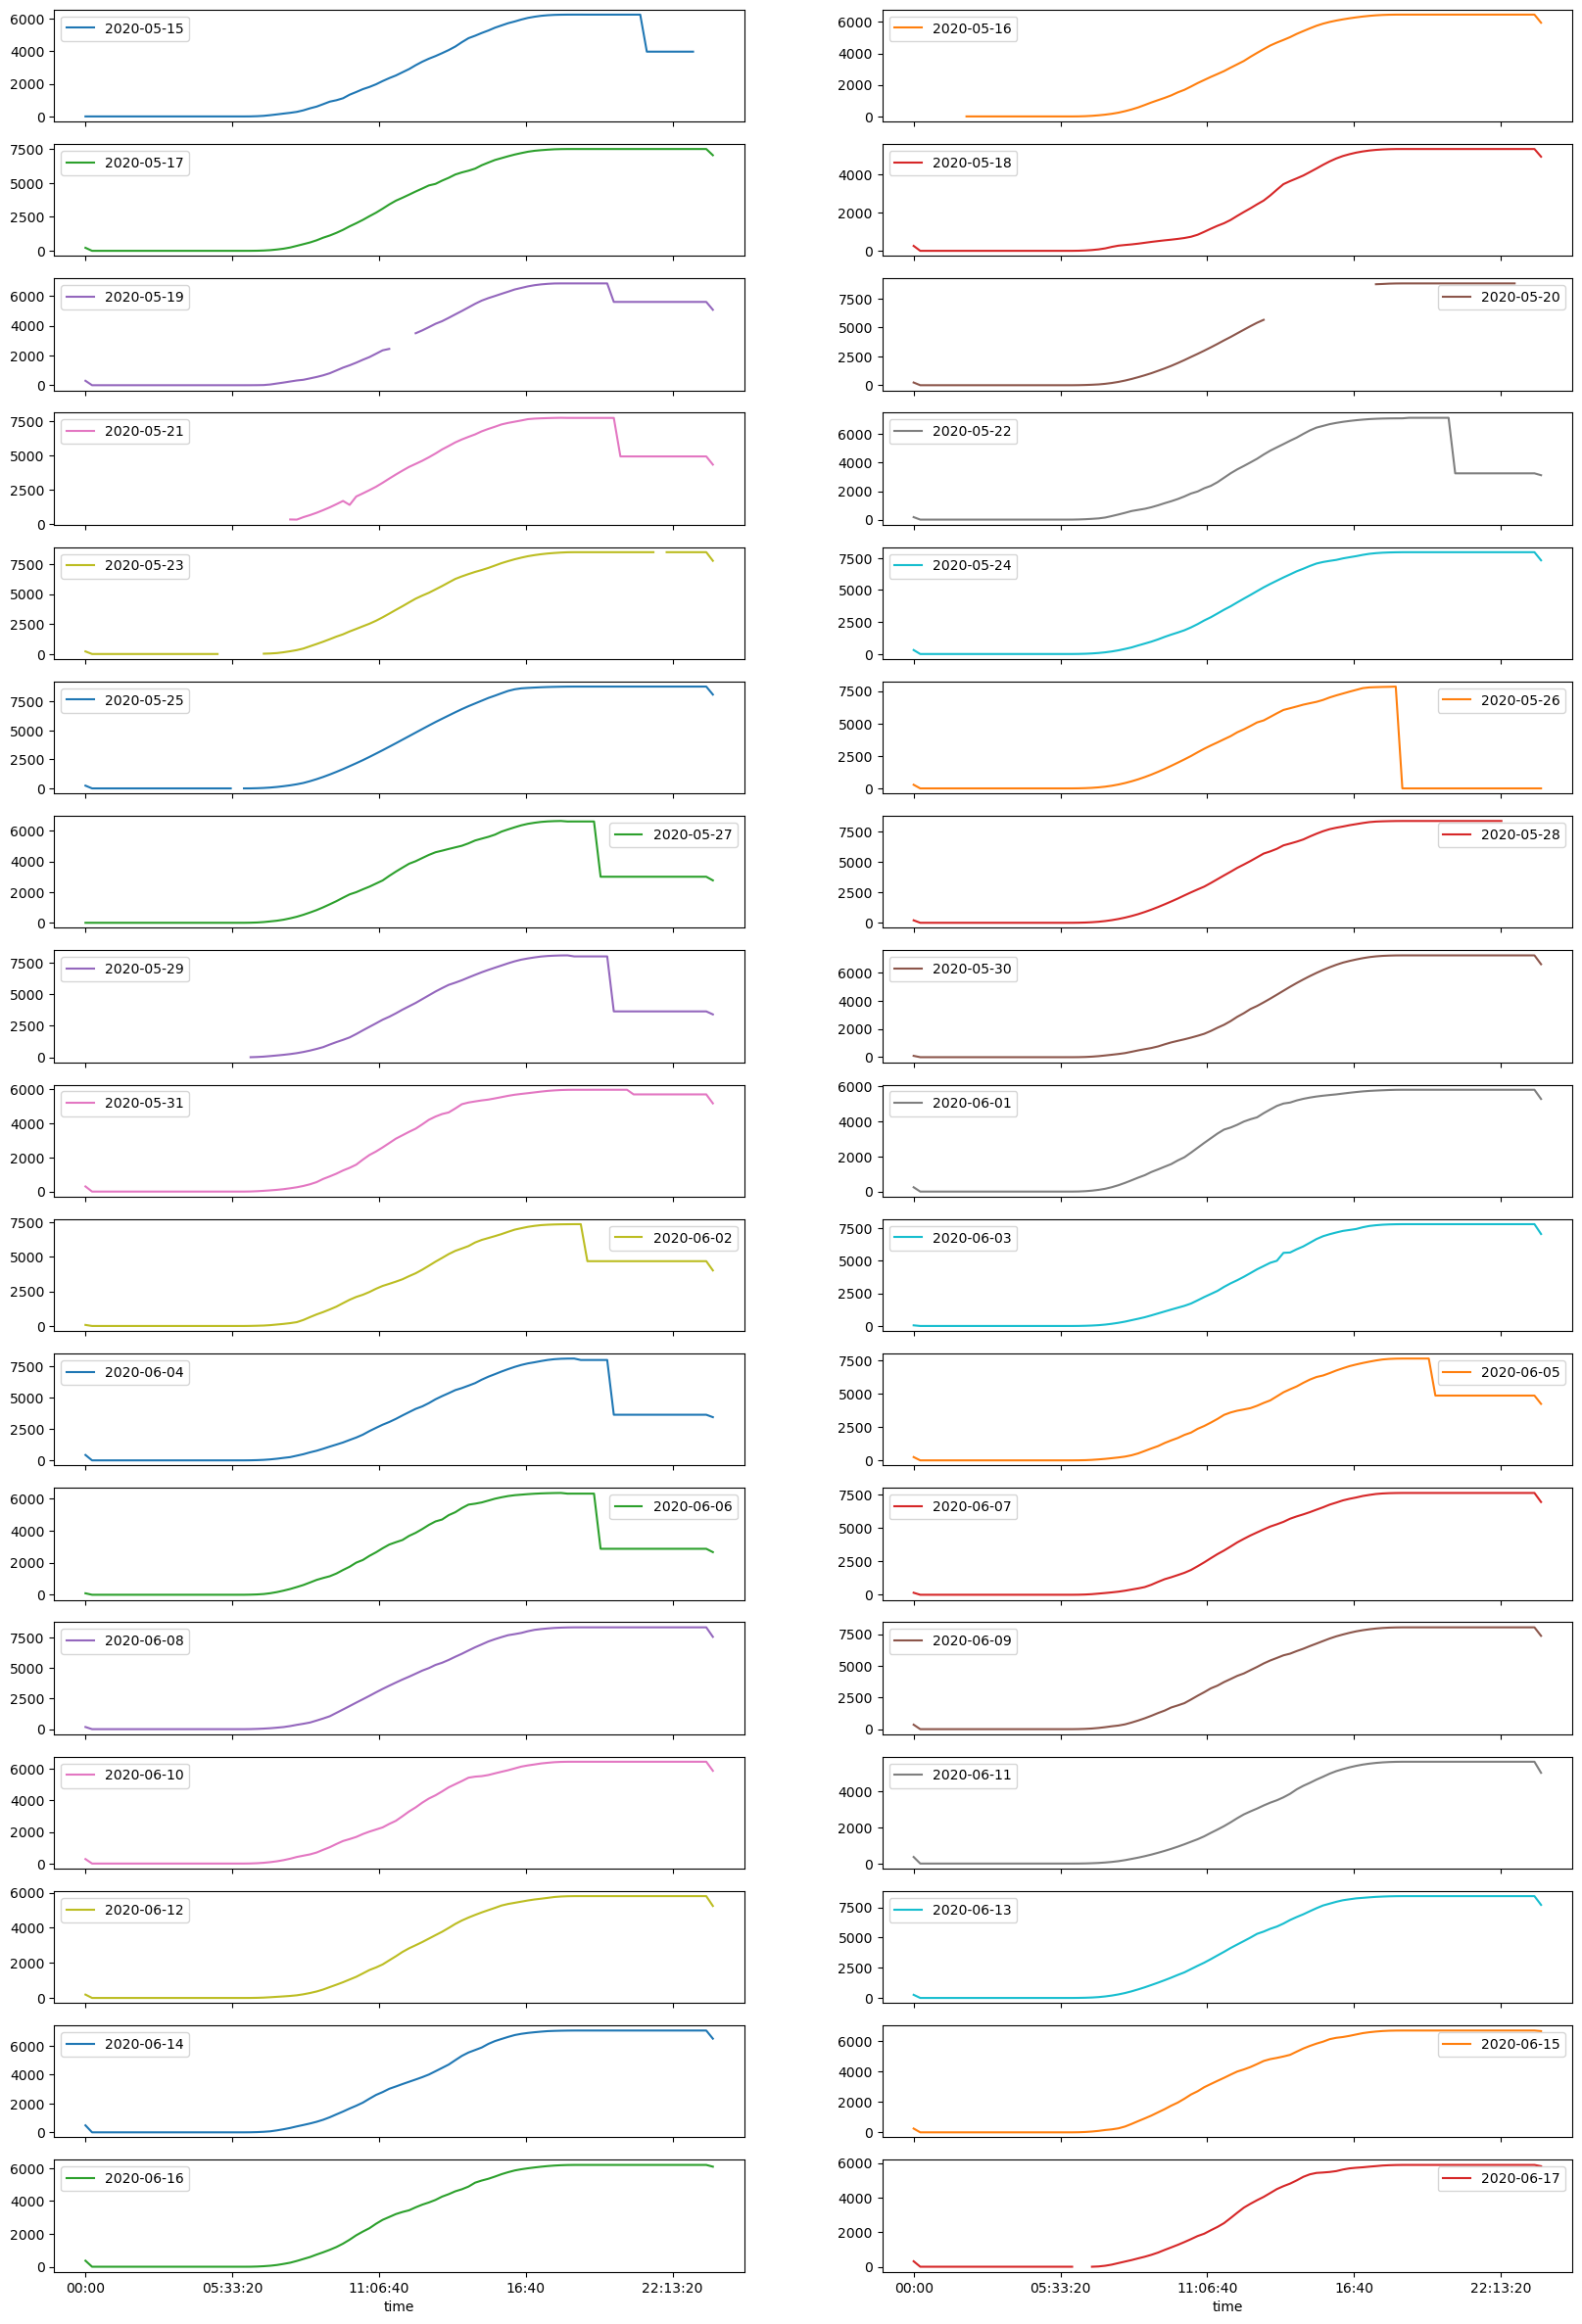

In [37]:
ax=temp_gen1.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
temp_gen1.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size-15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()